<a href="https://colab.research.google.com/github/sahintarkan/Machine-Learning/blob/main/ML_2_(Multiple_Linear_Regression_and_Regression_Error_Metrics)_11_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression and Regression Error Metrics

## Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

lineer regresyon icin gereken sartlar
1-iki feature arasinda linear iliski olmali
2-error lar normal distrubiton dagilim olmali , residuallar in pozitifleri ile negatifleri normal dagilmali yuzde yuz simetrik olmasada 

hatalari cezalandirmak - hatalari minimize etmeye calismaya yardimci olur


## Read Dataset

In [ ]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
print(np.mean([100, 110, 120, 115])) #outlier gostermek icin ornek bu kodlar
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [ ]:
print(np.mean([100, 110, 120, 700]))#burda da outlier var mean std de ile ayni hemen hemen
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [ ]:
print(np.mean([100, 110, 120, 900])) #outlier var kesinlikle mean den buyk standart sapma
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

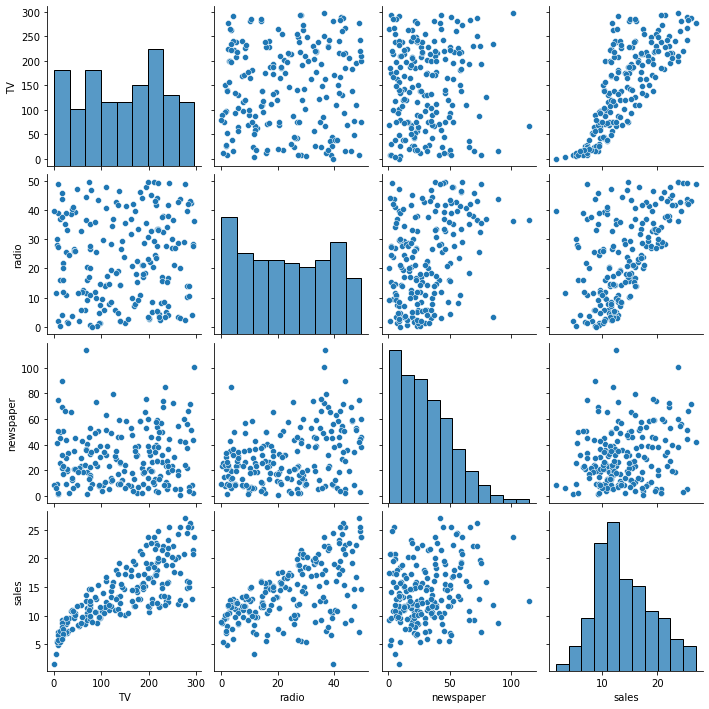

In [ ]:
sns.pairplot(df);

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

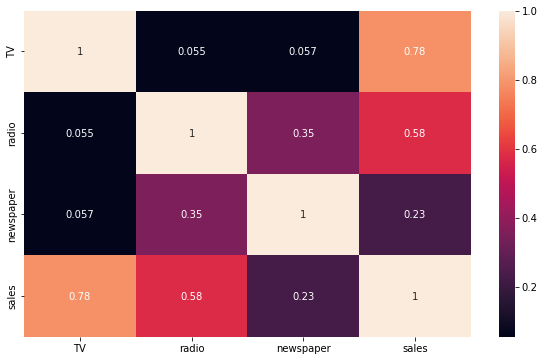

In [ ]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [ ]:
#pip install scikit-learn

You should consider upgrading via the 'C:\Users\pc\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [ ]:
df.sample(15)

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
104,238.2,34.3,5.3,20.7
150,280.7,13.9,37.0,16.1
175,276.9,48.9,41.8,27.0
160,172.5,18.1,30.7,14.4
...,...,...,...,...
79,116.0,7.7,23.1,11.0
151,121.0,8.4,48.7,11.6
61,261.3,42.7,54.7,24.2
92,217.7,33.5,59.0,19.4


In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [ ]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [ ]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [ ]:
model.intercept_

2.979067338122631

In [ ]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [ ]:
X_test.loc[95]

TV           163.3
radio         31.6
newspaper     52.9
Name: 95, dtype: float64

In [ ]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [ ]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.408024203228628

In [ ]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
...,...,...,...
104,20.7,20.137663,0.562337
135,11.6,14.055140,-2.455140
137,20.8,20.854112,-0.054112
164,11.9,11.017444,0.882556


In [ ]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
...,...,...,...
124,19.7,19.560367,0.139633
16,12.5,13.251035,-0.751035
148,10.9,12.336207,-1.436207
93,22.2,21.306951,0.893049


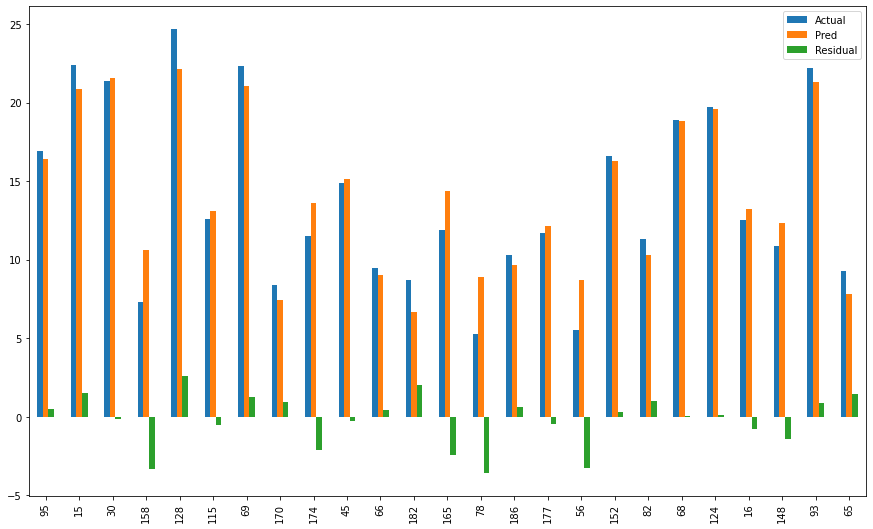

In [ ]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
R2_score = r2_score(y_test, y_pred)  # r squere x deki degisim y de ne kadar etkisi olmusu r squere acikliyor.
R2_score

0.8994380241009119

In [ ]:
mae = mean_absolute_error(y_test, y_pred) #hatalari fazla cezalandirmiyor. 1.4 hata yapiyor diyor
mae

1.4607567168117606

In [ ]:
mse = mean_squared_error(y_test, y_pred) #hatalari cok fazla cezalandiriyor. senin modelin 3.17 hata yapiyor.hemde yarumlayamiyoruz 
mse

3.1740973539761064

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #makul olcum yapiyor. 1.78 hata yapiyor.hangi cinsdense para vs
rmse

1.7815996615334508

In [ ]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [ ]:
mae / sales_mean

0.10417234564533859

In [ ]:
rmse / sales_mean

0.12705292647769303

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [ ]:
def adj_r2(y_test, y_pred, X):    #data miktari azsa featurelarimizi artirdikca skorlar kotulesiyor dedi hoca
    r2 = r2_score(y_test, y_pred) #simdide feature ekledikce yalanci bir iyilesme oluyor bu yalanci iyilesmeyi adj_r2 bunun onune geciyor.
    n = X.shape[0]   # number of observations  
    p = X.shape[1]-1 # number of independent variables  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
X.shape, X.shape[1]

((200, 3), 3)

In [ ]:
adj_r2(y_test, y_pred, X)

0.8984170903354389

## What is the concept of punishment for RMSE error metric?

In [ ]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}  # 6000

In [ ]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [ ]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [ ]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [ ]:
#mae
df_2.residual.sum()/5 

200.0

In [ ]:
#rmse
((df_2.residual**2).sum()/5)**0.5 

209.76176963403032

## Evaluation Model

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8994380241009119
MAE 		: 1.4607567168117606
MSE 		: 3.1740973539761064
RMSE 		: 1.7815996615334508


In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
eval_metric(y_train, y_train_pred) #train ve test skorlari yakinsa model guzel denebilir degerler uzaksa model iyi degil denir

Model testing performance:
--------------------------
R2_score 	: 0.8957008271017818
MAE 		: 1.1984678961500137
MSE 		: 2.705129423081414
RMSE 		: 1.644727765644337


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [ ]:
residuals = y_test-y_pred

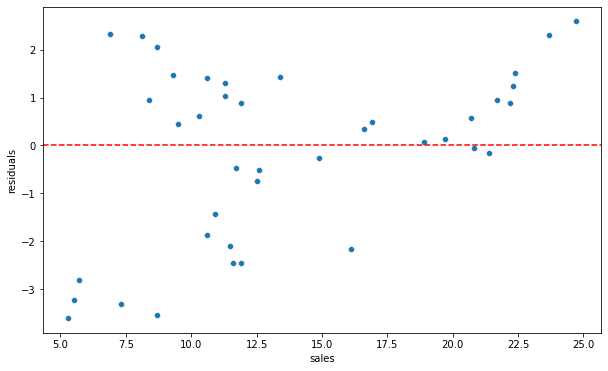

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

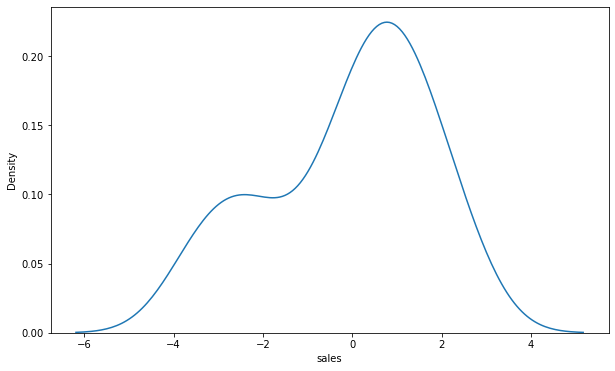

In [ ]:
sns.kdeplot(residuals)

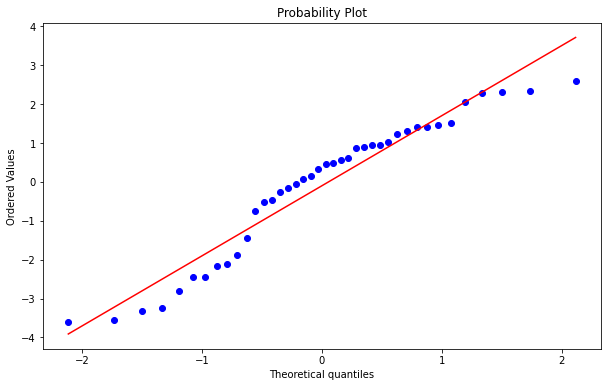

In [ ]:
stats.probplot(residuals, dist ="norm", plot =plt); #data bu line a dolanirsa normal dagilim denebilir

In [ ]:
from scipy.stats import skew #datanin normal dagilim olup olmadigi -0.5 ila +0.5 arasi ise normal dagilim
skew(residuals)

-0.539906192773982

In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pc\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install -U yellowbrick

You should consider upgrading via the 'C:\Users\pc\anaconda3\python.exe -m pip install --upgrade pip' command.


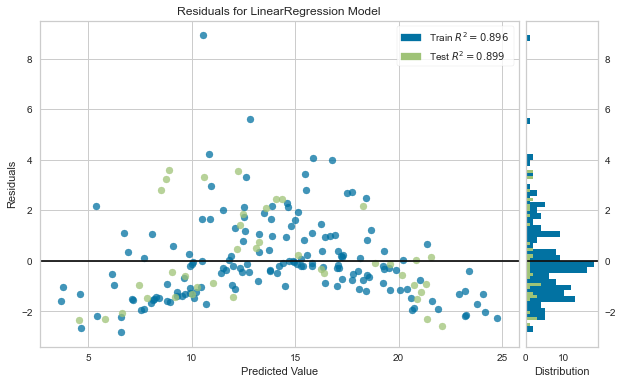

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

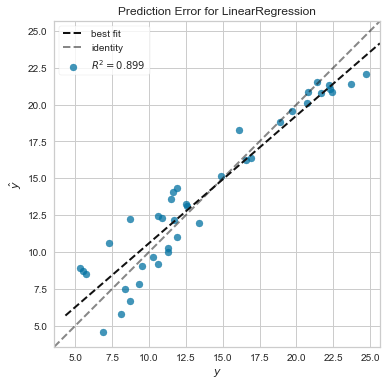

In [ ]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
final_model.intercept_

2.9388893694594085

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [ ]:
coeff_df

NameError: name 'coeff_df' is not defined

## Prediction on New Data

In [ ]:
adv = [[150, 20, 15]] # 2D iki boyutlu olmali cift parentez df yani

In [ ]:
adv

[[150, 20, 15]]

In [ ]:
final_model.predict(adv)

array([13.55862413])

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
final_model.intercept_

2.9388893694594085

In [ ]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495994

In [ ]:
adv_2 = [[150, 20, 15], [160, 20, 15]] #tv yi 10 artirdik ve 0.45 lik artis oldu bunu yukaridaki coefficient tv nin bir birimlik katsayisi 0.045 oldugunu goemustuk 10 la carpinca 0.45 lik artis olacagi hesaplanabilir.

In [ ]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [ ]:
14.01627059 - 13.55862413

0.4576464599999994